# Introduction to NLP Fundatmentals in TensorFlow

NLP has the goal of deriving information out of natural language

Another common term for NLP problem is seq2seq

## Check for GPU

In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


## Downloading helper function inside the folder


! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [2]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

The dataset we're going ti be using is Kaggle's introduction to NLP dataset. A classification problem

[Competition Link](https://www.kaggle.com/competitions/nlp-getting-started/overview)

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data('nlp_getting_started.zip')

--2024-03-13 23:32:43--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:804::201b, 2404:6800:4009:80d::201b, 2404:6800:4009:813::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:804::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: 'nlp_getting_started.zip.2'

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.1s    

2024-03-13 23:32:43 (4.18 MB/s) - 'nlp_getting_started.zip.2' saved [607343/607343]



## Become one with the data

In [4]:
# Read thed data
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac= 1, random_state= 42)

train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
# How many examples of each class
train_df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [8]:
# How may samples
len(train_df), len(test_df)

(7613, 3263)

In [9]:
# Let's visualise some random training examples
import random
random_index = random.randint(0, len(train_df) - 5)

for row in train_df_shuffled[['text', 'target']][random_index: random_index + 5].itertuples():
    _, text, target = row
    print(f"Target: {'Disaster' if target == 1 else 'Not a disaster'}")
    print(f"Text: {text}")
    print("----\n")


Target: Disaster
Text: @Erker Again?? Eep! Thought of you yesterday when I saw that hella scary hail. #armageddon?
----

Target: Disaster
Text: #hot  C-130 specially modified to land in a stadium and rescue hostages in Iran in 1980 http://t.co/W0EXzAD5Gc #prebreak #best
----

Target: Disaster
Text: @UniversityofLaw For the people who died in Human Experiments by Unit 731 of Japanese military http://t.co/vVPLFQv58P http://t.co/eG1fsKqBv6
----

Target: Disaster
Text: Latest : Trains derailment: 'It's the freakiest of freak accidents' - The Indian Express: The Indi... http://t.co/iLdbeJe225 #IndianNews
----

Target: Disaster
Text: Motorcyclist bicyclist injured in Denver collision on Broadway: http://t.co/241cN8yxjq by @kierannicholson
----



### Split data into training and validation sets

In [10]:
from sklearn.model_selection import train_test_split

# Use train_test_split() to split the trianing data into train and validation dataset

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(), train_df_shuffled['target'].to_numpy(), test_size= 0.1, random_state= 42)

In [11]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [12]:
# Check the first 10 sentences
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to nuumbers.

There are a few ways to do this:
* Tokenization
* Embedding

### Text vectorization (tokenization)

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use defalut TextVectorization parameter
text_vectorizer = TextVectorization(max_tokens= None, # how many words in vocab
                                    standardize= 'lower_and_strip_punctuation',
                                    split= 'whitespace',
                                    ngrams= None, # creates a group of words
                                    output_mode= 'int', # in which format the output should be
                                    output_sequence_length= None, # how long deos the output sequence should be of
                                    )

In [14]:
# Find the average number of tokens in the training tweets
round(sum([len(i.split()) for i in train_sentences]) // len(train_sentences))

14

In [15]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocab
max_length = 15 # max length our sequences will be

text_vectorizer = TextVectorization(max_tokens= max_vocab_length,
                                    output_mode= 'int',
                                    output_sequence_length= max_length)

In [16]:
# Fit the text vectorization to training set
text_vectorizer.adapt(train_sentences)

In [17]:
# Create a sample sentence and tokenize it
sample_sentences = "There's a flood in my street!"

text_vectorizer([sample_sentences])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [18]:
# Choose a random sentences from the training sentences
random_sentences = random.choice(train_sentences)
print(f"Original text: {random_sentences}")
print(f"Vectorized sentence: {text_vectorizer([random_sentences])}")

Original text: *to Luka* They should all die! All of them! Everything annihilated! - Alois Trancy
Vectorized sentence: [[   5 5182   64  168   44  686   44    6   93  709  558 6232 4390    0
     0]]


In [19]:
words_in_vocab = text_vectorizer.get_vocabulary() # retrieves all of the unique words

tope_5_words = words_in_vocab[:5] # gets the most common words
bottom_5_words = words_in_vocab[-5:] # gets the least common words

print(f"Number fo words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {tope_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number fo words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding layer

We're going to use Tensorflow Embedding layer.


The parameters we care most about our embedding layers:
* `input_dim`
* `output_dim`
* `input_length`

In [22]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim= max_vocab_length, # set input shape
                             output_dim= 128,
                            #  input_length= max_length # how long is each input
                             )

embedding

<Embedding name=embedding_2, built=False>

In [23]:
# Get a ranomd sentence from the training set
random_sentences = random.choice(train_sentences)

print(f"Original sentences: {random_sentences}")

# Embed the random sentences
sample_embde = embedding(text_vectorizer([random_sentences]))
sample_embde

Original sentences: Tales of the #trees #deep water loving #Lake Tahoe. And no #forest fires https://t.co/xuhMJ098Lq


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.0459482 ,  0.03820625, -0.00944789, ..., -0.00482849,
         -0.03102969,  0.03560256],
        [-0.04430331,  0.04988122, -0.03079559, ..., -0.03603041,
         -0.01753774, -0.04832139],
        [-0.01498369, -0.01773777, -0.02725281, ...,  0.02096945,
          0.0482461 , -0.025371  ],
        ...,
        [-0.00196964, -0.02036949,  0.03472633, ..., -0.03056114,
         -0.02057943, -0.00333996],
        [ 0.02420746, -0.02193842, -0.0486379 , ..., -0.03193476,
          0.04191594, -0.00281013],
        [ 0.03358766,  0.0382969 ,  0.04578682, ..., -0.00260104,
         -0.01285019,  0.02403567]]], dtype=float32)>

In [24]:
# Check out a single token's embedding
sample_embde[0][0], sample_embde[0][0].shape, random_sentences[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.0459482 ,  0.03820625, -0.00944789,  0.01065737, -0.04283671,
         0.00488403,  0.04644314,  0.04737041,  0.00115569,  0.04558444,
         0.007434  , -0.04764159, -0.01953284, -0.04718586,  0.04299584,
         0.00213576,  0.03046933,  0.02810046, -0.02463889,  0.03671053,
         0.02391391,  0.04718944,  0.04715394,  0.01378547, -0.01128869,
         0.04869794,  0.03285262,  0.00197094, -0.00577684, -0.04010676,
        -0.03761643, -0.00124691,  0.01855982, -0.04347393, -0.01458404,
         0.04982673,  0.01406865, -0.04490464,  0.01740512,  0.04370717,
        -0.0107438 , -0.03235755,  0.04239957, -0.01781919, -0.02763485,
        -0.01060547,  0.01722733,  0.03261106, -0.01860147,  0.04464109,
        -0.0185172 , -0.02181394, -0.0201294 ,  0.02227605, -0.04318444,
         0.03879983,  0.00675918, -0.03775544,  0.0479707 , -0.01598407,
         0.0237735 ,  0.04668415,  0.03435334, -0.01641153, -0.03494107,
  

## Modeling a text dataset

Experiments:

* Model 0: Naive Bayes
* Model 1: Feed-forward neural network
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: Tensorflow Hub pretrained fetaure extractor
* Model 7: Same as Model 6 but with 10% of the data

### Model 0: Getting a baseline

> **Note**: It is common practice to use non-DL algorithm as a baseline because of their speed and then alter using DL to see if you can improve upon them

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenizer and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert the text data into numerical form using tf-idf technique
    ("clf", MultinomialNB()) # classifier for the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [26]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves: {baseline_score * 100 :.2f}%")

Our baseline model achieves: 79.27%


In [27]:
# Make prediction
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [28]:
# Create an evaluation function to evaluate the model
# A function which returns a dictionary of accuracy, precision, recall and f1-score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def evaluation(y_true, y_pred):
    '''
    This function gives the evaluation of the classification model in a dictionary form (Accuracy, Precision, Recall and F1-score)

    Parameters:
        y_true: The true labels of the evaluation data
        y_pred: The predicted labels of the evaluation data

    Returns:
        A dictionary with keys: `accuracy`, `precision`, `recall`, `f1-score`
    '''

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred, average= 'weighted') # we are using weighted  average because the dataset is slightly imbalanced

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1score
    }

In [29]:
baseline_results = evaluation(y_true= val_labels, 
           y_pred= baseline_preds)

### Model 1: A Simple dense model

In [30]:
# Create directory to save tensorboard callback logs
SAVED_DIR = "model_logs"

In [31]:
# Build model with the Functiobnal API

inputs = layers.Input(shape= (1, ), dtype= tf.string)
x = text_vectorizer(inputs) # convert text to numbers
x = embedding(x) # convert numbers to matrix
x = layers.GlobalAveragePooling1D(name= 'global_avg_pool_layer')(x)
outputs = layers.Dense(1, activation= 'sigmoid', name= 'output_layer')(x)

model_1 = tf.keras.Model(inputs, outputs, name= 'model_1_dense')

In [32]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool_layer           │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
model_1.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

In [35]:
model_1_history = model_1.fit(x = train_sentences,
                              y= train_labels,
                              epochs= 5,
                              validation_data= (val_sentences, val_labels),
                              callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20240313-233852
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6433 - loss: 0.6474 - val_accuracy: 0.7677 - val_loss: 0.5297
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8098 - loss: 0.4605 - val_accuracy: 0.7769 - val_loss: 0.4864
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8549 - loss: 0.3593 - val_accuracy: 0.7900 - val_loss: 0.4589
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8963 - loss: 0.2860 - val_accuracy: 0.7861 - val_loss: 0.4626
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9179 - loss: 0.2331 - val_accuracy: 0.7822 - val_loss: 0.4810


In [36]:
model_1.evaluate(val_sentences, val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7708 - loss: 0.5154


[0.4809878170490265, 0.7821522355079651]

In [37]:
model_1_preds = model_1.predict(val_sentences)
model_1_preds.shape

 1/24 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(762, 1)

In [38]:
model_1_results = evaluation(y_true= val_labels,
           y_pred= tf.round(tf.squeeze(model_1_preds)))

In [39]:
import numpy as np

np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True, False])

## Visualizing learned embeddings

In [40]:
# Get the vocabulary from the text vectorization
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [41]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool_layer           │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

Now we've got the embedding matrix, let's see how to visualize it. To do so, Tensorflow has a handy tool called [projector](https://projector.tensorflow.org).

In [43]:
# Get the weight matrix of the embedding layer
embed_weights = model_1.get_layer('embedding_2').get_weights()
embed_weights[0].shape

(10000, 128)

In [44]:
# Create embedding files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[0][index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

### Model 2: LSTM

LSTM = Long Short Term Memory

Architecture of the model:

```
Input(text) -> Tokenize -> Embedding -> Layers -> Output

```

In [45]:
# Create an LSTM Model
inputs = layers.Input(shape = (1, ), dtype= "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(units= 64, return_sequences= True, name= 'LSTM_layer_1')(x) # when stacking RNN cells together you need to set return_sequences = True 
# x = layers.LSTM(64, name= 'LSTM_layer_2')(x)
x = layers.GlobalAveragePooling1D(name= 'global_avg_pool_layer')(x)
x = layers.Dense(64, activation= 'relu', name= 'dense_layer')(x)
outputs = layers.Dense(1, activation= 'sigmoid', name= 'output_layer')(x)

model_2 = tf.keras.Model(inputs, outputs, name= 'model_2_LSTM')

In [46]:
model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer_1 (LSTM)             │ (None, 15, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool_layer           │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,333,633 (5.09 MB)

 Trainable params: 1,333,633 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model_2.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

In [49]:
model_2_history = model_2.fit(x = train_sentences,
                              y = train_labels,
                              epochs= 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVED_DIR, 'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240313-234000
Epoch 1/5


215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8961 - loss: 0.3256 - val_accuracy: 0.7730 - val_loss: 0.5702
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9415 - loss: 0.1621 - val_accuracy: 0.7756 - val_loss: 0.5860
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9573 - loss: 0.1178 - val_accuracy: 0.7651 - val_loss: 0.6445
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9581 - loss: 0.1128 - val_accuracy: 0.7703 - val_loss: 0.8266
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9646 - loss: 0.0934 - val_accuracy: 0.7664 - val_loss: 0.8914


In [50]:
model_2_pred = model_2.predict(val_sentences)
model_2_pred[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[0.30227736],
       [0.8809425 ],
       [0.99997246],
       [0.08332486],
       [0.00165229],
       [0.99909675],
       [0.941947  ],
       [0.99999666],
       [0.99998295],
       [0.39399585]], dtype=float32)

In [51]:
model_2_results = evaluation(y_true= val_labels,
                             y_pred= tf.squeeze(tf.round(model_2_pred)))
model_2_results

{'accuracy': 0.7664041994750657,
 'precision': 0.7623456790123457,
 'recall': 0.7097701149425287,
 'f1-score': 0.7655229275917975}

In [52]:
np.array(list(model_2_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True, False])

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit

In [53]:
# Build an RNN using the GRU cell
inputs = layers.Input(shape= (1, ), dtype= 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, name= 'GRU_layer_1')(x) # if you want to stack GRU cell return_sequences = True
# x = layers.LSTM(42, name= 'LSTM_layer_1', return_sequences= True)(x)
# x = layers.GRU(99, name= 'GRU_layer_2')(x)
# x = layers.Dense(64, activation= 'relu', name= 'dense_layer_1')(x)
# x = layers.GlobalAveragePooling1D(name= 'global_avg_pool_layer')(x)
outputs = layers.Dense(1, activation= 'sigmoid', name= 'output_layer')(x)
model_3 = tf.keras.Model(inputs, outputs, name= 'model_3_GRU')

In [54]:
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_layer_1 (GRU)               │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model_3.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

In [57]:
model_3_history = model_3.fit(x= train_sentences,
                                y= train_labels,
                                epochs= 5,
                                validation_data= (val_sentences, val_labels),
                                callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20240313-234037
Epoch 1/5


215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8841 - loss: 0.2690 - val_accuracy: 0.7835 - val_loss: 0.8203
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9667 - loss: 0.0900 - val_accuracy: 0.7664 - val_loss: 0.8427
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9717 - loss: 0.0735 - val_accuracy: 0.7782 - val_loss: 0.9772
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9773 - loss: 0.0641 - val_accuracy: 0.7769 - val_loss: 0.8679
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9758 - loss: 0.0600 - val_accuracy: 0.7664 - val_loss: 0.9383


In [58]:
model_3_pred = model_3.predict(val_sentences)
model_3_pred

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[8.19700062e-02],
       [9.23719466e-01],
       [9.99530315e-01],
       [6.59761801e-02],
       [3.31276708e-04],
       [9.98528838e-01],
       [5.29377580e-01],
       [9.99805868e-01],
       [9.99769866e-01],
       [6.89102411e-01],
       [1.19334308e-03],
       [7.47996211e-01],
       [1.88781647e-03],
       [1.49529770e-01],
       [2.96466285e-04],
       [9.65418294e-03],
       [4.07152576e-03],
       [1.61185372e-03],
       [6.47489280e-02],
       [9.99418497e-01],
       [9.96983707e-01],
       [2.20791961e-04],
       [9.97838438e-01],
       [2.12029293e-02],
       [9.99630570e-01],
       [9.99786317e-01],
       [7.38690235e-03],
       [2.99248891e-03],
       [2.25846190e-03],
       [4.40377295e-01],
       [9.54768777e-01],
       [3.72934178e-03],
       [1.82091370e-01],
       [4.07104660e-03],
       [8.93998802e-01],
       [1.12564966e-01],
       [9.99465168e-01],
       [2.97226906e-01],
       [5.25809489e-02],
       [9.99620557e-01],


In [59]:
model_3_results = evaluation(val_labels,
                             tf.squeeze(tf.round(model_3_pred)))
model_3_results

{'accuracy': 0.7664041994750657,
 'precision': 0.7777777777777778,
 'recall': 0.6839080459770115,
 'f1-score': 0.7645419362124183}

In [60]:
np.array(list(model_3_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True, False])

### Model 4: Bidirectional RNN

In [61]:
# Create bidirectional model
inputs = layers.Input(shape= (1, ), dtype= 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences= True), name= 'birectional_LSTM_layer_1')(x)
x = layers.Bidirectional(layers.GRU(64), name= 'bidirectional_LSTM_layer_2')(x)
# x = layers.GlobalAveragePooling1D(name= 'global_avg_pool_layer')(x)
outputs = layers.Dense(1, activation= 'sigmoid', name= 'output_layer')(x)

model_4 = tf.keras.Model(inputs, outputs, name= 'model_4_bidirectional')

In [62]:
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ birectional_LSTM_layer_1        │ (None, 15, 128)        │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_LSTM_layer_2      │ (None, 128)            │        74,496 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,453,441 (5.54 MB)

 Trainable params: 1,453,441 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model_4.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

In [64]:
model_4_history = model_4.fit(x= train_sentences,
            y= train_labels,
            epochs= 5,
            validation_data= (val_sentences, val_labels),
            callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240313-234054
Epoch 1/5


215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9496 - loss: 0.1660 - val_accuracy: 0.7585 - val_loss: 0.9824
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9766 - loss: 0.0578 - val_accuracy: 0.7717 - val_loss: 1.3399
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9798 - loss: 0.0467 - val_accuracy: 0.7717 - val_loss: 1.2157
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9796 - loss: 0.0468 - val_accuracy: 0.7717 - val_loss: 1.3793
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9808 - loss: 0.0440 - val_accuracy: 0.7690 - val_loss: 1.2332


In [65]:
model_4_pred = model_4.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [66]:
model_4_results = evaluation(val_labels,
                             tf.squeeze(tf.round(model_4_pred)))
model_4_results

{'accuracy': 0.7690288713910761,
 'precision': 0.7654320987654321,
 'recall': 0.7126436781609196,
 'f1-score': 0.7681575014390807}

In [67]:
np.array(list(model_4_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True, False])

## CNN for Text and other types of sequences

We've used CNNs for image dataset which are 2D, however, our text data is 1D.

Previously for image we used Conv2D, but for text data we will use Conv1D

Architecture:
```
Input -> Tokenization -> Embedding -> CNN and Dense layers -> Output
```

### Model 5: 1D CNN

In [68]:
# Create the model
inputs = layers.Input(shape= (1, ), dtype= 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(64, 3, name= 'cnn_1d_layer_1')(x)
x = layers.MaxPool1D(name= 'max_pool_layer_1')(x)
x = layers.Conv1D(32, 3, name= 'cnn_1d_layer_2')(x)
x = layers.MaxPool1D(name= 'max_pool_layer_2')(x)
x = layers.GlobalAveragePooling1D(name= 'global_avg_pool_layer')(x)
outputs = layers.Dense(1, activation= 'sigmoid', name= 'output_layer')(x)

model_5 = tf.keras.Model(inputs, outputs, name= 'model_5_cnn_1d')

In [69]:
model_5.summary()

Model: "model_5_cnn_1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_1d_layer_1 (Conv1D)         │ (None, 13, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_1 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_1d_layer_2 (Conv1D)         │ (None, 4, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_2 (MaxPooling1D) │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool_layer           │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,310,849 (5.00 MB)

 Trainable params: 1,310,849 (5.00 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model_5.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

In [71]:
model_5_history = model_5.fit(x = train_sentences,
                              y= train_labels,
                              epochs= 5,
                              validation_data= (val_sentences, val_labels),
                              callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_5_cnn_1d')])

Saving TensorBoard log files to: model_logs/model_5_cnn_1d/20240313-234130
Epoch 1/5


215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9335 - loss: 0.2019 - val_accuracy: 0.7664 - val_loss: 1.0037
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9707 - loss: 0.0758 - val_accuracy: 0.7717 - val_loss: 1.0076
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9760 - loss: 0.0581 - val_accuracy: 0.7598 - val_loss: 1.1030
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9770 - loss: 0.0579 - val_accuracy: 0.7598 - val_loss: 1.2598
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9763 - loss: 0.0576 - val_accuracy: 0.7612 - val_loss: 1.1361


In [72]:
model_5_pred = model_5.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [73]:
model_5_results = evaluation(val_labels,
                             tf.squeeze(tf.round(model_5_pred)))

In [74]:
model_5_results

{'accuracy': 0.7611548556430446,
 'precision': 0.7610062893081762,
 'recall': 0.6954022988505747,
 'f1-score': 0.7599510749117049}

In [75]:
np.array(list(model_5_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True, False])

### Model 6: Transfer learning

In [76]:
import tensorflow_hub as hub
embed = hub.load('https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2')

In [77]:
embed_samples = embed(["When you complete with the downloading of the model then you will look into the encodings of this sentence"])
print(embed_samples[0][:50])

tf.Tensor(
[ 0.07687581  0.03288896  0.02179662 -0.04832654 -0.02299898 -0.00182735
 -0.03993054  0.08256393  0.01381563  0.03039743  0.01625713  0.02431568
  0.01514284  0.04843347  0.01244256  0.01343128  0.0023421  -0.02713761
 -0.00362572  0.00168669  0.01138663  0.0144208  -0.01719462 -0.03496176
 -0.07877127  0.04676209  0.03929747  0.02202034  0.01709515  0.0230419
  0.0915276  -0.03294362 -0.00317207 -0.04850543 -0.09554192  0.04421337
 -0.02980342  0.01039704 -0.0229306   0.06235658 -0.01796251 -0.02358888
 -0.02192312 -0.04135567  0.01966412  0.01150151 -0.0491185  -0.03221893
 -0.02000231 -0.04916013], shape=(50,), dtype=float32)


In [105]:
# Create Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
                                        trainable= False,
                                        input_shape= [],
                                        dtype= 'string',
                                        name= 'USE_layer')

In [115]:
sentence_encoder_layer(['My name is Krish'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-0.03238289, -0.05245493,  0.04398123,  0.08645649,  0.0403287 ,
         0.02778761,  0.01360367, -0.05401811,  0.07342335, -0.10168328,
         0.04169078,  0.01746771,  0.01697551,  0.08183341,  0.04074554,
        -0.06998817, -0.02465056,  0.01813797,  0.03823309, -0.05905127,
        -0.0325998 ,  0.01989053,  0.03508671,  0.02060026, -0.02009015,
        -0.00600971, -0.03311038, -0.00088635, -0.03305436,  0.03735072,
         0.01317158, -0.02199938,  0.06701411, -0.03493086,  0.00618752,
        -0.03558873,  0.00633682, -0.01458311, -0.05471493,  0.01281769,
        -0.03007764, -0.04722793,  0.0224523 ,  0.05050883, -0.0157575 ,
         0.03174941, -0.06826104, -0.00246264,  0.00637875, -0.01882537,
        -0.05425334, -0.06500769, -0.08937915,  0.01339249, -0.03500324,
         0.0213948 ,  0.05863417,  0.00646127, -0.07630017,  0.07731503,
         0.03519434, -0.08840882, -0.08824165, -0.01939562,  0.02466386,
 

In [83]:
# Create model using Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu', name= 'dense_layer_1'),
    layers.Dense(1, activation= 'sigmoid', name= 'output_layer')
], name= 'model_6_USE')

model_6.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_6.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x3ec16df60> (of type <class 'tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject'>)

In [ ]:
model_6_history = model_6.fit(x= train_sentences,
            y= train_labels,
            epochs= 5,
            validation_data= (val_sentences, val_labels),
            callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_6_USE')])

Saving TensorBoard log files to: model_logs/model_6_USE/20240313-002122
Epoch 1/5
215/215 [==============================] - 70s 308ms/step - loss: 0.4938 - accuracy: 0.7848 - val_loss: 0.4554 - val_accuracy: 0.7927
Epoch 2/5
215/215 [==============================] - 40s 188ms/step - loss: 0.4165 - accuracy: 0.8120 - val_loss: 0.4494 - val_accuracy: 0.8031
Epoch 3/5
215/215 [==============================] - 39s 182ms/step - loss: 0.4064 - accuracy: 0.8238 - val_loss: 0.4438 - val_accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 36s 167ms/step - loss: 0.4024 - accuracy: 0.8243 - val_loss: 0.4446 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 30s 138ms/step - loss: 0.3998 - accuracy: 0.8241 - val_loss: 0.4411 - val_accuracy: 0.8176


In [ ]:
model_6_pred = model_6.predict(val_sentences)

24/24 [==============================] - 19s 582ms/step


In [ ]:
model_6_results = evaluation(val_labels,
                             tf.squeeze(tf.round(model_6_pred)))
model_6_results

{'accuracy': 0.8175853018372703,
 'precision': 0.8235294117647058,
 'recall': 0.764367816091954,
 'f1-score': 0.8168602489629228}

In [ ]:
np.array(list(model_6_results.values())) > np.array(list(baseline_results.values()))

array([ True, False,  True,  True])

### Model 7: TF hub pretrained USE but with 10% of training data

Transfer learning helps alot when you don't have a large dataset.

Let's replicate `model_6` with only 10% of the training data

In [ ]:
# Create subsets of 10% of the training data
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [ ]:
train_sentences_10_percent[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [ ]:
model_7 = tf.keras.models.clone_model(model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 use_layer (KerasLayer)      (None, 512)               256797824 
                                                                 
 dense_layer_1 (Dense)       (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_7.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

In [ ]:
model_7_history = model_7.fit(train_sentences_10_percent,
            train_labels_10_percent,
            epochs= 5,
            validation_data= (val_sentences, val_labels),
            callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_7_10_percent')])

Saving TensorBoard log files to: model_logs/model_7_10_percent/20240313-002524
Epoch 1/5
22/22 [==============================] - 41s 2s/step - loss: 0.6514 - accuracy: 0.7182 - val_loss: 0.6152 - val_accuracy: 0.7690
Epoch 2/5
22/22 [==============================] - 17s 787ms/step - loss: 0.5643 - accuracy: 0.8058 - val_loss: 0.5607 - val_accuracy: 0.7677
Epoch 3/5
22/22 [==============================] - 15s 710ms/step - loss: 0.4978 - accuracy: 0.8190 - val_loss: 0.5165 - val_accuracy: 0.7795
Epoch 4/5
22/22 [==============================] - 17s 794ms/step - loss: 0.4476 - accuracy: 0.8336 - val_loss: 0.4969 - val_accuracy: 0.7782
Epoch 5/5
22/22 [==============================] - 14s 634ms/step - loss: 0.4150 - accuracy: 0.8409 - val_loss: 0.4886 - val_accuracy: 0.7795


In [ ]:
model_7_pred = model_7.predict(val_sentences)

24/24 [==============================] - 20s 773ms/step


In [ ]:
model_7_results = evaluation(val_labels,
                             tf.squeeze(tf.round(model_7_pred)))
model_7_results

{'accuracy': 0.7795275590551181,
 'precision': 0.7903225806451613,
 'recall': 0.7040229885057471,
 'f1-score': 0.777998488727556}

In [ ]:
np.array(list(model_7_results)) > np.array(list(baseline_results))

array([False, False, False, False])

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame

all_model_results = pd.DataFrame({
                                    "Baseline": baseline_results,
                                    "Feed Forward": model_1_results,
                                    "LSTM": model_2_results,
                                    "GRU": model_3_results,
                                    "Bidirectional": model_4_results,
                                    "1DCNN": model_5_results,
                                    "USE Pretrained model": model_6_results,
                                    "10% training data": model_7_results
                                })
all_model_results = all_model_results.transpose()

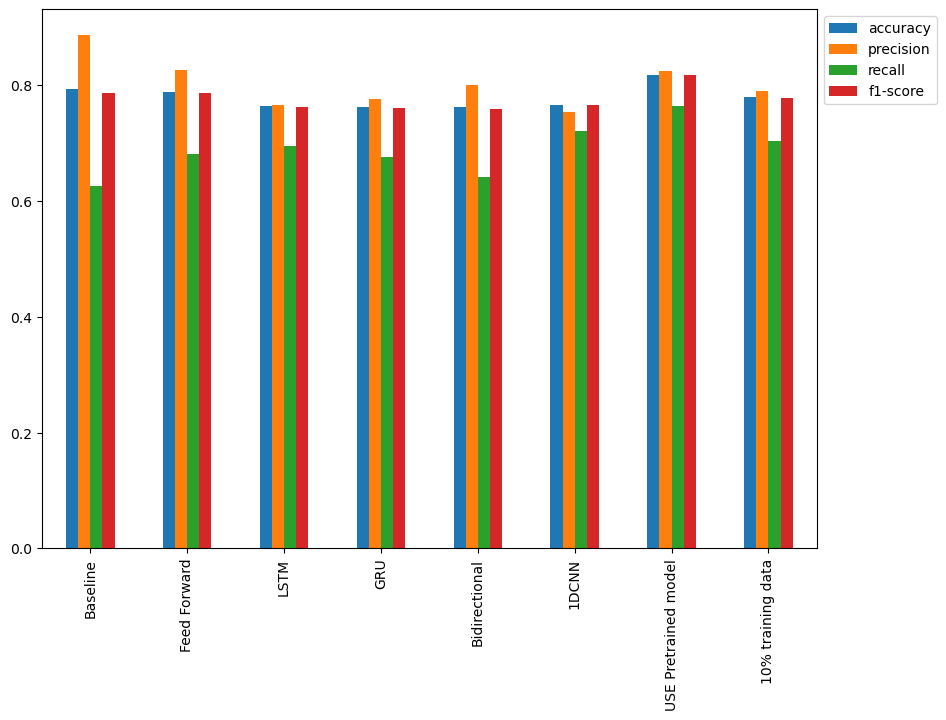

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind= 'bar', figsize= (10, 7)).legend(bbox_to_anchor= (1.0, 1.0))

<Axes: >

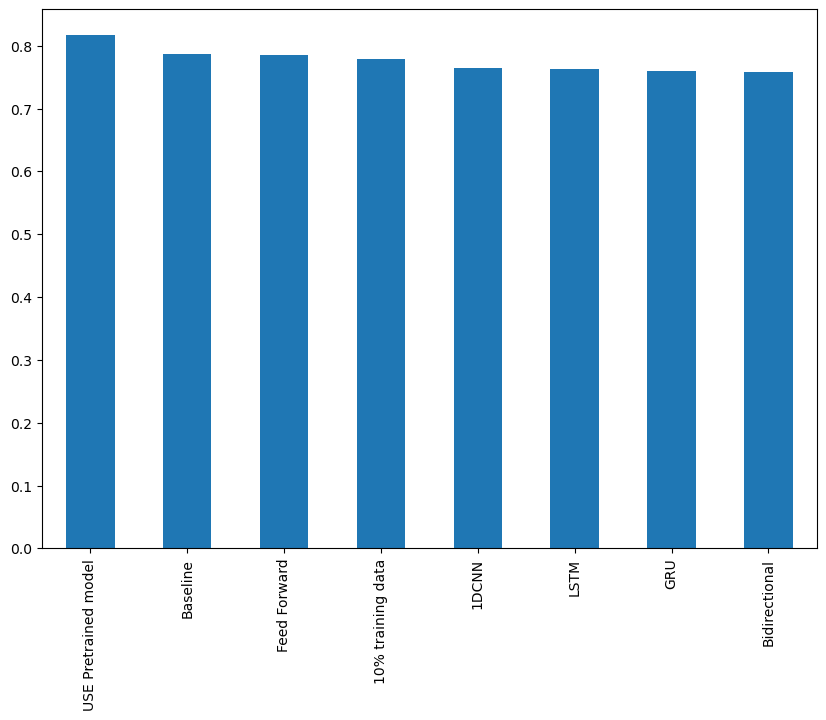

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values('f1-score', ascending= False)['f1-score'].plot(kind= 'bar', figsize= (10, 7))

## Saving and loading a trained model

There are two main formats to save a model to in TensorFlow:
1. `HDF5`
2. `SavedModel`

In [ ]:
# Save Model 6 in HDF5 format
model_6.save('model_6.h5')

/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model with custom Hub layer (HDF5 required for this)
loaded_model = tf.keras.models.load_model('model_6.h5', 
                                          custom_objects= {"KerasLayer": hub.KerasLayer})

In [ ]:
loaded_model.evaluate(val_sentences, val_labels)

24/24 [==============================] - 19s 748ms/step - loss: 0.4411 - accuracy: 0.8176


[0.4410739243030548, 0.817585289478302]

In [ ]:
model_6_results

{'accuracy': 0.8175853018372703,
 'precision': 0.8235294117647058,
 'recall': 0.764367816091954,
 'f1-score': 0.8168602489629228}

Now let's save to `SavedModel` Format

In [ ]:
# Save Model 6 in SavedModel Format
model_6.save('model_6')

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0xbf378c700>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0xbf378c700>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0xbf378c700>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: model_6/assets


INFO:tensorflow:Assets written to: model_6/assets


In [ ]:
# Load model from SavedModel Format
load_model_SavedFormat = tf.keras.models.load_model('model_6')

In [ ]:
load_model_SavedFormat.evaluate(val_sentences, val_labels)

24/24 [==============================] - 16s 595ms/step - loss: 0.4411 - accuracy: 0.8176


[0.4410739243030548, 0.817585289478302]

## Finding the most wrong examples

* What examples is it getting wrong?
* and of these wrong examples which ones is it getting *most* wrong

In [ ]:
# Download a pretrained model
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

unzip_data('08_model_6_USE_feature_extractor.zip')

--2024-03-13 00:44:02--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:821::201b, 2404:6800:4009:822::201b, 2404:6800:4009:823::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:821::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: '08_model_6_USE_feature_extractor.zip'

08_model_6_USE_feat 100%[===================>] 916.27M  16.4MB/s    in 58s     

2024-03-13 00:45:01 (15.9 MB/s) - '08_model_6_USE_feature_extractor.zip' saved [960779165/960779165]



In [ ]:
# Import the previously trained model
model_6_pretrained = tf.keras.models.load_model('08_model_6_USE_feature_extractor')
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 19s 682ms/step - loss: 0.4626 - accuracy: 0.8150


[0.4625638723373413, 0.8149606585502625]

In [ ]:
# Make predictions with the loaded model
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))

24/24 [==============================] - 7s 240ms/step


In [ ]:
# Create a DataFrame with validation sentences and best performing model predictions
val_df = pd.DataFrame({
    "text": val_sentences,
    "target": val_labels,
    "pred": model_6_pretrained_preds,
    "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)
})

val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.150038
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.778320
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.993571
3,@camilacabello97 Internally and externally scr...,1,0.0,0.081233
4,Radiation emergency #preparedness starts with ...,1,1.0,0.765295


In [ ]:
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending= False)

In [ ]:
most_wrong.head()

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.938052
759,FedEx will no longer transport bioterror patho...,0,1.0,0.906743
628,@noah_anyname That's where the concentration c...,0,1.0,0.868803
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.863820
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.850418


In [ ]:
most_wrong.tail()

,text,target,pred,pred_prob
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.009397
233,I get to smoke my shit in peace,1,0.0,0.008726
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.007062
38,Why are you deluged with low self-image? Take ...,1,0.0,0.003761
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.002968


In [ ]:
# Check the false positives
for row in most_wrong[:10].itertuples():
    _, text, target, pred, pred_prob = row
    print(f"Target: {target}, Prediction: {pred}, Probablity: {pred_prob}")
    print(f"Text: {text}")
    print("------\n")

Target: 0, Prediction: 1.0, Probablity: 0.938052237033844
Text: ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying
------

Target: 0, Prediction: 1.0, Probablity: 0.9067429304122925
Text: FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J
------

Target: 0, Prediction: 1.0, Probablity: 0.8688034415245056
Text: @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.
------

Target: 0, Prediction: 1.0, Probablity: 0.8638204336166382
Text: @SonofLiberty357 all illuminated by the brightly burning buildings all around the town!
------

Target: 0, Prediction: 1.0, Probablity: 0.850417971611023
Text: Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0
------

Target: 0, Prediction: 1.0, Probablity: 0.8402822017669678
Text: @AshGhebranious civil rights continued in the 60s. And what about tra

In [ ]:
# Check the false negatives
for row in most_wrong[-10:].itertuples():
    _, text, target, pred, pred_prob = row
    print(f"Target: {target}, Prediction: {pred}, Probablity: {pred_prob}")
    print(f"Text: {text}")
    print("------\n")

Target: 1, Prediction: 0.0, Probablity: 0.02049633115530014
Text: going to redo my nails and watch behind the scenes of desolation of smaug ayyy
------

Target: 1, Prediction: 0.0, Probablity: 0.017684536054730415
Text: 'The way you move is like a full on rainstorm and I'm a house of cards'
------

Target: 1, Prediction: 0.0, Probablity: 0.016750570386648178
Text: You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.
------

Target: 1, Prediction: 0.0, Probablity: 0.015886280685663223
Text: @DavidVonderhaar At least you were sincere ??
------

Target: 1, Prediction: 0.0, Probablity: 0.009706276468932629
Text: @SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren
------

Target: 1, Prediction: 0.0, Probablity: 0.009396703913807869
Text: @willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
test_pred_probs = model_6_pretrained.predict(test_df['text'].to_list())

102/102 [==============================] - 61s 592ms/step


In [ ]:
test_pred = tf.squeeze(tf.round(test_pred_probs))
test_pred

<tf.Tensor: shape=(3263,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 0., 1.], dtype=float32)>

In [ ]:
test_samples = random.sample(test_df['text'].to_list(), 10)
test_pred_probs = model_6_pretrained.predict(test_samples)
test_pred = tf.squeeze(tf.round(test_pred_probs))
for i, text in enumerate(test_samples):
    print(f"Prediction: {'Disaster' if test_pred[i] == 1 else 'Not a Disaster'} Prediction Probability: {test_pred_probs[i][0]:.2f}")
    print(f"Text: {text}")
    print("-----\n")

1/1 [==============================] - 2s 2s/step
Prediction: Not a Disaster Prediction Probability: 0.23
Text: So running down the stairs was a bad idea full on collided... With the floor ??
-----

Prediction: Disaster Prediction Probability: 0.86
Text: Arsonist torches a house himself and his getaway vehicle police say - Surrey Leader http://t.co/q0J5lTVD6k @RichardGEarl
-----

Prediction: Not a Disaster Prediction Probability: 0.16
Text: @rymathieson are you coming to meltdown!
-----

Prediction: Not a Disaster Prediction Probability: 0.14
Text: @halfpeachh @CaitlinCavanah I can't deal right now OMG WHO REMEMBERS BLOODY MARY? ????
-----

Prediction: Disaster Prediction Probability: 0.93
Text: Pak army helicopter crashed in Mansehra. 
Pray for departed souls. http://t.co/XclNBVvfSi
-----

Prediction: Not a Disaster Prediction Probability: 0.45
Text: The Dones felt grief bordering on devastation at losing connection with God through their church communities. Packard http://t.co/r2pQQP

## Speed/Score Tradeoff

In [ ]:
model_6_results

{'accuracy': 0.8175853018372703,
 'precision': 0.8235294117647058,
 'recall': 0.764367816091954,
 'f1-score': 0.8168602489629228}

In [ ]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1-score': 0.7862189758049549}

In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
    '''
    Times how long a model takes to make predictions on samples
    '''

    start_time = time.perf_counter()
    model.predict(samples)
    end_time = time.perf_counter()

    total_time = end_time - start_time
    time_per_pred = total_time / len(samples)
    return total_time, time_per_pred

In [ ]:
# Calculate model 6 time complexity
model_6_total_time, model_6_time_per_pred = pred_timer(model_6_pretrained, val_sentences)
model_6_total_time, model_6_time_per_pred

24/24 [==============================] - 6s 187ms/step


(5.697020583997073, 0.007476404965875424)

In [ ]:
# Calculcate baseling model time complexity
baseline_total_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_time, baseline_time_per_pred

(0.03804241699981503, 4.9924431758287446e-05)

In [ ]:
model_6_pretrained_results = evaluation(val_labels, 
                                        model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 0.8149606299212598,
 'precision': 0.8438538205980066,
 'recall': 0.7298850574712644,
 'f1-score': 0.8132300658103407}

Text(0, 0.5, 'F1-Score')

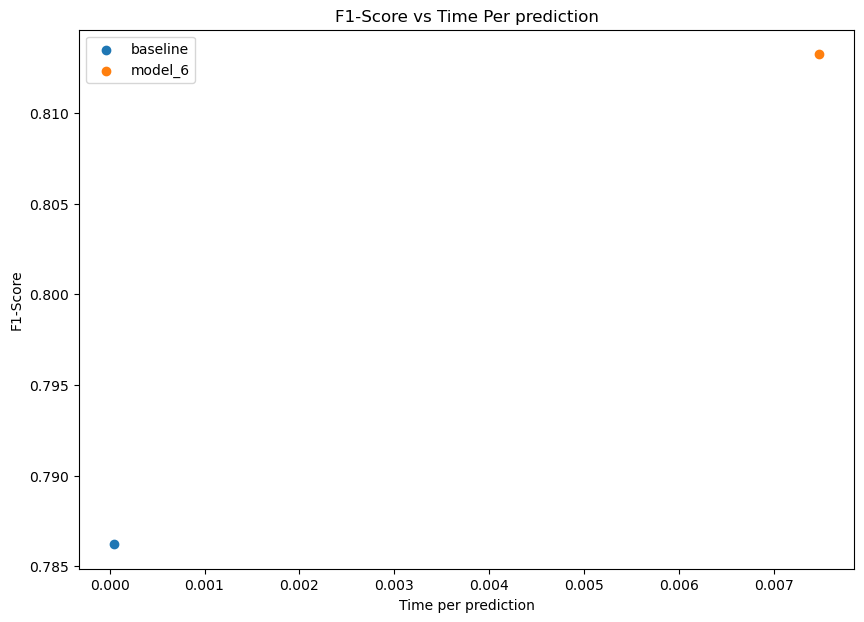

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
plt.scatter(baseline_time_per_pred, baseline_results['f1-score'], label= 'baseline')
plt.scatter(model_6_time_per_pred, model_6_pretrained_results['f1-score'], label= 'model_6')
plt.legend()
plt.title('F1-Score vs Time Per prediction')
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score")